In [1]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
import timeit

from QuantumWalk.State import State
from QuantumWalk.Operator import Operator
from QuantumWalk.QuantumWalk import QuantumWalk
from QuantumWalk.ProbabilityDistribution import ProbabilityDistribution

# Cycle Graph

In [2]:
n = 1000
t=600
gamma=1/(2*np.sqrt(2))
marked = [int(n/2)]

initState = State(n,marked)
initState.buildState()
print("N=%s\tTime=%s\tGamma=%s\t"%(n,t,round(gamma,2)))

N=1000	Time=600	Gamma=0.35	


In [3]:
startTimeGraph = timeit.default_timer()
graph2 = nx.cycle_graph(n)
endTimeGraph = timeit.default_timer()

executionTimeGraph = (endTimeGraph - startTimeGraph)
print("Graph took %s seconds." % executionTimeGraph)

Graph took 0.0032796849991427734 seconds.


In [4]:
# ------ Linalg Expm version (much slower) ------ #

# op = Operator(graph2,n,t,gamma)

# startTimeExpm = timeit.default_timer()
# op.buildOperator()
# endTimeExpm = timeit.default_timer()

# executionTimeExpm = (endTimeExpm - startTimeExpm)
# print("\tNormal operator took %s seconds. (linalg.expm)" % executionTimeExpm)

In [5]:
# ------ Diagonal version ------ #

op = Operator(graph2,n,t,gamma)

startTimeExpm = timeit.default_timer()
op.buildDiagonalOperator()
endTimeExpm = timeit.default_timer()

executionTimeExpm = (endTimeExpm - startTimeExpm)
print("Diagonal operator took %s seconds." % executionTimeExpm)
# print("Normal / Diagonal = %s times faster" % (round(executionTimeExpm / executionTimeDiag, 2)))

Diagonal operator took 7.421290807000332 seconds.


In [6]:
walk = QuantumWalk(initState,op)

startTimeWalk = timeit.default_timer()
walk.buildWalk()
endTimeWalk = timeit.default_timer()

executionTimeWalk = (endTimeWalk - startTimeWalk)
print("Walk took %s seconds." % executionTimeWalk)

Walk took 0.0033897329994942993 seconds.


In [7]:
probDist = ProbabilityDistribution(walk.getWalk())

startTimeProbDist = timeit.default_timer()
probDist.buildProbDist()
endTimeProbDist = timeit.default_timer()

executionTimeProbDist = (endTimeProbDist - startTimeProbDist)
print("ProbDist took %s seconds." % executionTimeProbDist)

ProbDist took 0.033838859000752564 seconds.


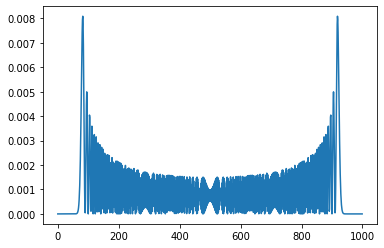

In [8]:
plt.plot(probDist.getProbDist())

# Complete Graph

In [9]:
n = 1000
t=600
gamma=1/(2*np.sqrt(2))
marked = [int(n/4),int(n/2),int(n/2)+int(n/4)]

initState = State(n,marked)
initState.buildState()
print("N=%s\tTime=%s\tGamma=%s\t"%(n,t,round(gamma,2)))

N=1000	Time=600	Gamma=0.35	


In [10]:
startTimeGraph = timeit.default_timer()
graph2 = nx.complete_graph(n)
endTimeGraph = timeit.default_timer()

executionTimeGraph = (endTimeGraph - startTimeGraph)
print("Graph took %s seconds." % executionTimeGraph)

Graph took 0.6794366680005623 seconds.


In [11]:
# ------ Diagonal version ------ #

op = Operator(graph2,n,t,gamma)

startTimeExpm = timeit.default_timer()
op.buildDiagonalOperator()
endTimeExpm = timeit.default_timer()

executionTimeExpm = (endTimeExpm - startTimeExpm)
print("Diagonal operator took %s seconds." % executionTimeExpm)
# print("Normal / Diagonal = %s times faster" % (round(executionTimeExpm / executionTimeDiag, 2)))

Diagonal operator took 7.688404217000425 seconds.


In [12]:
walk = QuantumWalk(initState,op)

startTimeWalk = timeit.default_timer()
walk.buildWalk()
endTimeWalk = timeit.default_timer()

executionTimeWalk = (endTimeWalk - startTimeWalk)
print("Walk took %s seconds." % executionTimeWalk)

Walk took 0.00344163100089645 seconds.


In [13]:
probDist = ProbabilityDistribution(walk.getWalk())

startTimeProbDist = timeit.default_timer()
probDist.buildProbDist()
endTimeProbDist = timeit.default_timer()

executionTimeProbDist = (endTimeProbDist - startTimeProbDist)
print("ProbDist took %s seconds." % executionTimeProbDist)

ProbDist took 0.04168913099965721 seconds.


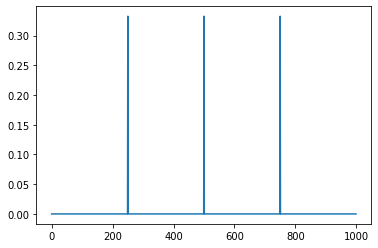

In [14]:
plt.plot(probDist.getProbDist())

# 2D Graphs

In [21]:
n = 10
m = 100
t= 10
gamma=1/(2*np.sqrt(2))
marked = [int(n/2)]

initState = State(n*m,marked)
initState.buildState()
print("N=%s\tTime=%s\tGamma=%s\t"%(n,t,round(gamma,2)))


N=10	Time=10	Gamma=0.35	


In [22]:
startTimeGraph = timeit.default_timer()
graph2 = nx.grid_2d_graph(n, m)
endTimeGraph = timeit.default_timer()

executionTimeGraph = (endTimeGraph - startTimeGraph)
print("Graph took %s seconds." % executionTimeGraph)
# nx.draw(graph2)

Graph took 0.011269307000475237 seconds.


In [23]:
# ------ Diagonal version ------ #

op = Operator(graph2,n,t,gamma)

startTimeExpm = timeit.default_timer()
op.buildDiagonalOperator()
endTimeExpm = timeit.default_timer()

executionTimeExpm = (endTimeExpm - startTimeExpm)
print("Diagonal operator took %s seconds." % executionTimeExpm)
# print("Normal / Diagonal = %s times faster" % (round(executionTimeExpm / executionTimeDiag, 2)))

Diagonal operator took 7.626905205001094 seconds.


In [24]:
walk = QuantumWalk(initState,op)

startTimeWalk = timeit.default_timer()
walk.buildWalk()
endTimeWalk = timeit.default_timer()

executionTimeWalk = (endTimeWalk - startTimeWalk)
print("Walk took %s seconds." % executionTimeWalk)

Walk took 0.00367953699969803 seconds.


In [25]:
probDist = ProbabilityDistribution(walk.getWalk())

startTimeProbDist = timeit.default_timer()
probDist.buildProbDist()
endTimeProbDist = timeit.default_timer()

executionTimeProbDist = (endTimeProbDist - startTimeProbDist)
print("ProbDist took %s seconds." % executionTimeProbDist)

ProbDist took 0.03455388299880724 seconds.


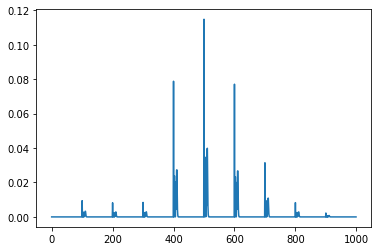

In [26]:
plt.plot(probDist.getProbDist())